# Homework 2
The Stefan-Boltzmann equation represents the radiation of heat from a lumped mass (i.e., black body radiation), and is mathematically represented as:
\begin{equation}
    \frac{dT}{dt}=-\alpha (T^{4}-T^{4}_{a}),
\end{equation}
where $T$ is the internal temperature of the lumped mass, $T_{a}$ is the ambient temperature, and a constant $\alpha$ is a function of the area of the lumped mass, Stefan-Boltzmann constant, and the emissivity of the material. We seek solutions for $t>0$. Since this is an initial-value problem, $T_{0}$ (i.e., $T(t=0)$) is known. The exact solution for this equation is:
\begin{equation}
    {\tan^{-1} \left ( \frac{T}{T_{a}}\right )-\tan^{-1} \left ( \frac{T_{0}}{T_{a}}\right )+0.5 \log \left [ \frac{(T_{0}-T_{a})(T+T_{a})}{(T_{0}+T_{a})(T-T_{a})} \right ] =2 \alpha T^{3}_{a} t.}
\end{equation}
where, $\alpha=4\times10^{-12}~\mathrm{K^{-3}s^{-1}}$, $T_{a}=250~\mathrm{K}$ and $T_{0}=2500~\mathrm{K}$.

***

## Analytical Solution
Since the solution for $T$ at any given time is present in multiple terms in the analytical solution, we require an implicit method to solve the analytical equation. Below, we use the Newton-Raphson method to iteratively solve for $T$ at a given time:

$$ T_{n} = T_{i} - \frac{f(T)}{df/dT} $$

where the subscripts $n$ and $i$ indicate successive guesses in the iterative approach. The function $f$ is:

$$  f(T) = {\tan^{-1} \left ( \frac{T}{T_{a}}\right )-\tan^{-1} \left ( \frac{T_{0}}{T_{a}}\right )+0.5 \log \left [ \frac{(T_{0}-T_{a})(T+T_{a})}{(T_{0}+T_{a})(T-T_{a})} \right ] -2 \alpha T^{3}_{a} t}=0 $$

and the derivative of $f$ with respect to temperature $T$ is:

$$ \frac{df}{dt}= -T_{a}^3/(T^4-T_{a}^4) $$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Warning: this is a bit slow

Ta = 250
T0 = 2500
alpha = 4*10**(-12)
time = np.arange(0, 10, 0.1)
tol = 1
max_iter = 1000
T_ana = np.zeros_like(time)
T_ana[0] = T0

for i in range(1, len(time), 1):
    t = time[i]
    print('t = ',t)
    Tini = T_ana[i-1]
    count = 0
    err = 10
    while (count<max_iter) | (err>tol):
        f = np.arctan(Tini/Ta)-np.arctan(T0/Ta)+0.5*np.log(((T0-Ta)*(Tini+Ta))/((Tini-Ta)*(T0+Ta)))-2*alpha*Ta**3*t
        g = -Ta**3/(Tini**4-Ta**4)
        Tnew  = Tini-f/g
        err   = abs(Tini-Tnew) 
        Tini  = Tnew
        count = count + 1
        
    T_ana[i]  = Tini

t =  0.1
t =  0.2
t =  0.30000000000000004
t =  0.4
t =  0.5
t =  0.6000000000000001
t =  0.7000000000000001
t =  0.8
t =  0.9
t =  1.0
t =  1.1
t =  1.2000000000000002
t =  1.3
t =  1.4000000000000001
t =  1.5
t =  1.6
t =  1.7000000000000002
t =  1.8
t =  1.9000000000000001
t =  2.0
t =  2.1
t =  2.2
t =  2.3000000000000003
t =  2.4000000000000004
t =  2.5
t =  2.6
t =  2.7
t =  2.8000000000000003
t =  2.9000000000000004
t =  3.0
t =  3.1
t =  3.2
t =  3.3000000000000003
t =  3.4000000000000004
t =  3.5
t =  3.6
t =  3.7
t =  3.8000000000000003
t =  3.9000000000000004
t =  4.0
t =  4.1000000000000005
t =  4.2
t =  4.3
t =  4.4
t =  4.5
t =  4.6000000000000005
t =  4.7
t =  4.800000000000001
t =  4.9
t =  5.0
t =  5.1000000000000005
t =  5.2
t =  5.300000000000001
t =  5.4
t =  5.5
t =  5.6000000000000005
t =  5.7
t =  5.800000000000001
t =  5.9
t =  6.0
t =  6.1000000000000005
t =  6.2
t =  6.300000000000001
t =  6.4
t =  6.5
t =  6.6000000000000005
t =  6.7
t =  6.800000000000001
t 

Text(0, 0.5, 'T (K)')

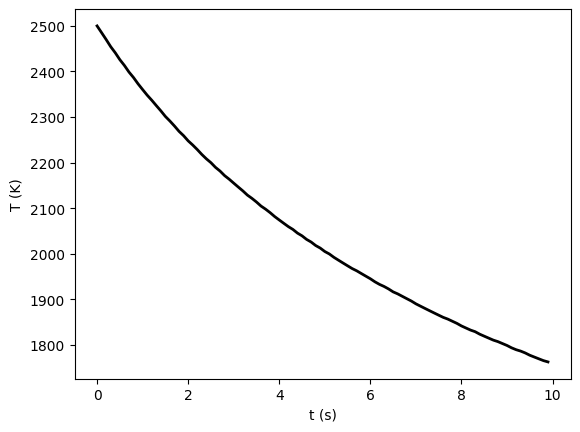

In [21]:
fig, ax = plt.subplots(1)
ax.plot(time, T_ana, 'k', lw=2)
ax.set_xlabel('t (s)')
ax.set_ylabel('T (K)')

## Taylor Series Approximation

We can use a Taylor series expansion to numerically estimate the temperature evolution to first order:

$$ T_{1} = T_{0} + \frac{\partial T}{\partial t}|_{t = t_{0}} $$

or

$$ T_{1} = T_{0} - \alpha(T_{0}^{4} - T_{a}^{4}) $$

We can estimate the temperature evolution to second order as:

$$ T_{2} = T_{0} - \alpha(T_{0}^{4} - T_{a}^{4}) + 4\alpha^{2}T_{0}^{3}(T_{0}^{4} - T_{a}^{4}) $$

Below, we develop Taylor series approximations considering up to fourth order terms, where variables $T_{prime}$ indicate derivatives.

In [25]:
time_tay = np.arange(0, 10, 0.25)

# define derivatives
T_prime  = -alpha*(T0**4-Ta**4)
T_prime2 = -4*alpha*T_prime*T0**3
T_prime3 = 4*alpha**2*(7*T0**6-3*T0**2*Ta**4)*T_prime
T_prime4 = -4*alpha**3*(70*T0**9-60*T0**5*Ta**4+6*T0*Ta**8)*T_prime

# calculate temperature
T1 = T0+T_prime*time_tay
T2 = T0+T_prime*time_tay+0.5*T_prime2*(time_tay**2)
T3 = T0+T_prime*time_tay+0.5*T_prime2*(time_tay**2)+(1/6)*T_prime3*(time_tay**3)
T4 = T0+T_prime*time_tay+0.5*T_prime2*(time_tay**2)+(1/6)*T_prime3*(time_tay**3)+(1/24)*T_prime4*(time_tay**4)

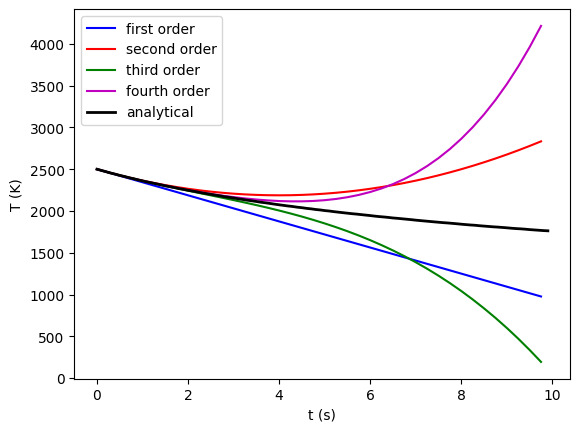

In [28]:
fig, ax = plt.subplots(1)
ax.plot(time_tay, T1, 'b', lw=1.5, label='first order')
ax.plot(time_tay, T2, 'r', lw=1.5, label='second order')
ax.plot(time_tay, T3, 'g', lw=1.5, label='third order')
ax.plot(time_tay, T4, 'm', lw=1.5, label='fourth order')
ax.plot(time, T_ana, 'k', lw=2, label='analytical')
ax.set_xlabel('t (s)')
ax.set_ylabel('T (K)')
ax.legend()

## Numerical Discretization Approximations

Use the (a) Forward Euler; (b) Backward Euler; (c) Corrected Euler; and (d) fourth-order Runge-Kutta methods to solve the Stefan-Boltzmann equation to numerically estimate the temperature evolution from $t=0$ to $t=10$.

Below, we reproduce the generic functions for each of the finite differences approximations from **finite_differences_schemes.ipynb** then call them to find solutions.

In [29]:
def forward_euler(f, a, b, ua, n):
    """
    
    :param f: derivative function, defined as a lambda function, see comment above
    :param a: independent variable start
    :param b: independent variable end
    :param ua: initial condition
    :param n: number of nodes
    :return: u: computed solution; t: independent variable
    """
    
    dh = np.abs(b-a)/(n-1)
    ui = ua # initial condition
    ti = a # initial start
    
    u = np.zeros([n]) # initialize arrays
    t = np.zeros([n])
    u[0] = ui
    t[0] = ti
    
    for i in range(1, n):
        # Advance the node
        tn = ti+dh
        # Solve for next step
        un = ui+dh*(f(ui,ti))
        
        t[i] = tn
        u[i] = un
        
        # Reset for next loop
        ti = tn
        ui = un
        
    return u, t

In [30]:
def backward_euler(f, df, a, b, ua, n, tol=0.01):
    """
    
    :param f: derivative function, defined as a lambda function, see comment above
    :param df: derivative of the derivative function with respect to the dependent variable, defined as a lambda function, see comment above
    :param a: independent variable start
    :param b: independent variable end
    :param ua: initial condition
    :param n: number of nodes
    :param tol: tolerance for solving Newton-Raphson method
    :return: u: computed solution; t: independent variable
    """
    
    dh = np.abs(b-a)/(n-1)
    ui = ua # initial condition
    ti = a # initial start
    
    u = np.zeros([n]) # initialize arrays
    t = np.zeros([n])
    u[0] = ui
    t[0] = ti
    
    for i in range(1, n):
        # Advance the node
        tn = ti+dh
        
        # Solve for next step iteratively
        dsol = 0.1 # error in the solution
        while dsol > tol:
            un = ui-(f(ui,ti)*dh+u[i-1]-ui)/(df(ui,ti)*dh-1)
            dsol = np.abs(un-ui)
            ui = un            
        
        t[i] = tn
        u[i] = un
        
        # Reset for next loop
        ti = tn
        
    return u, t

In [31]:
def corrected_euler(f, a, b, ua, n):
    """
    
    :param f: derivative function, defined as a lambda function, see comment above
    :param a: independent variable start
    :param b: independent variable end
    :param ua: initial condition
    :param n: number of nodes
    :return: u: computed solution; t: independent variable
    """
    
    dh = np.abs(b-a)/(n-1)
    ui = ua # initial condition
    ti = a # initial start
    
    u = np.zeros([n]) # initialize arrays
    t = np.zeros([n])
    u[0] = ui
    t[0] = ti
    
    for i in range(1, n):
        # Advance the node
        tn = ti+dh
              
        # Solve for next step
        ustar = ui+dh*(f(ui,ti))
        un = ui+(dh/2)*(f(ui,ti)+f(ustar,ti))
        
        t[i] = tn
        u[i] = un
        
        # Reset for next loop
        ti = tn
        ui = un
        
    return u, t

In [32]:
def rk_4step(f, a, b, ua, n):
    """
    
    :param f: derivative function, defined as a lambda function, see comment above
    :param a: independent variable start
    :param b: independent variable end
    :param ua: initial condition
    :param n: number of nodes
    :return: u: computed solution; t: independent variable
    """
    
    dh = np.abs(b-a)/(n-1)
    ui = ua # initial condition
    ti = a # initial start
    
    u = np.zeros([n]) # initialize arrays
    t = np.zeros([n])
    u[0] = ui
    t[0] = ti
    
    for i in range(1, n):
        # Calculate a half step
        thalf = dh/2

        # Advance the node
        tn = ti+dh
        
        # Solve in steps      
        u1 = ui+thalf*f(ui,ti)
        s1 = f(u1,ti+thalf)
        u2 = ui+thalf*s1
        s2 = f(u2,ti+thalf)
        u3 = ui+thalf*s2
        s3 = f(u3,ti+dh)
        
        un = ui+(dh/6)*(f(ui,ti)+2*s1+2*s2+s3)
        
        t[i] = tn
        u[i] = un
        
        # Reset for next loop
        ti = tn
        ui = un
        
    return u, t

In [33]:
f = lambda T, t: -alpha*(T**4 - Ta**4)
df = lambda T, t: -4*alpha*T**3

T1, time_num = forward_euler(f,0,10,2500,100)
T2, _ = backward_euler(f,df,0,10,2500,100,0.01)
T3, _ = corrected_euler(f,0,10,2500,100)
T4, _ = rk_4step(f,0,10,2500,100)

dt =  0.10101010101010101
dt =  0.10101010101010101
dt =  0.10101010101010101
dt =  0.10101010101010101


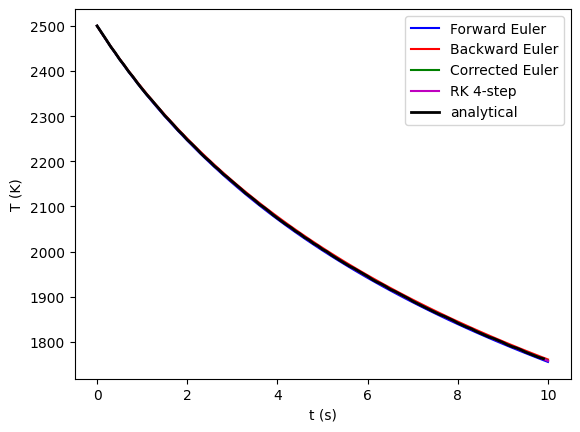

In [34]:
fig, ax = plt.subplots(1)
ax.plot(time_num, T1, 'b', lw=1.5, label='Forward Euler')
ax.plot(time_num, T2, 'r', lw=1.5, label='Backward Euler')
ax.plot(time_num, T3, 'g', lw=1.5, label='Corrected Euler')
ax.plot(time_num, T4, 'm', lw=1.5, label='RK 4-step')
ax.plot(time, T_ana, 'k', lw=2, label='analytical')
ax.set_xlabel('t (s)')
ax.set_ylabel('T (K)')
ax.legend()